# Análisis de Datos de historial de Sismos en Perú

El siguiente documento Muestra un reporte estadístico y visual sobre la actividad sísmica en Perú

In [8]:
from datetime import datetime
print("Última Ejecución: ", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Última Ejecución:  2025-03-02 02:56:22


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from io import StringIO
from folium.plugins import HeatMap

# Se utiliza StringIO para simular un archivo CSV
data_path = "data.csv"
df = pd.read_parquet(data_path)

Esta información viene de la Base de Datos anteriormente procesada. Solo se tiene en cuenta la actividad sísmica relevante, es decir, con una magnitud de 4 en escala de ritcher hasta 9.
Cualquier dato con datos diferentes, además de valores Nulos, fue eliminado para poder tener una muestra más limpia que analizar.

In [2]:
print("Estadísticas de los Datos")
print("Cantidad de Datos")
print(df.shape[0])

print("Muestra: ")
print(df.head())

Estadísticas de los Datos
Cantidad de Datos
5
Muestra: 
            fecha_peru  latitud  longitud  profundidad  magnitud
0  1950-03-12 14:23:45  -16.145   -72.144           60       7.5
1  1955-07-25 09:15:30  -15.000   -75.000           70       7.0
2  1963-11-05 02:50:10  -14.500   -74.500          150       6.4
3  1972-06-18 18:30:00  -12.500   -68.500          300       5.8
4  1988-09-27 07:45:20   -5.500   -77.500          100       5.7


Algunos de los datos más importantes son el rango de Fechas y los valores mínimos y máximos.

In [ ]:
print("Fecha de Inicio", df["fecha_peru"].min())
print("Fecha de Fin", df["fecha_peru"].max())


print("Valor Mínimo", df["magnitud"].min())
print("Valor Máximo", df["magnitud"].max())

print("Promedio de Magnitud", df["magnitud"].mean().round(3))
print("Desviación Estándar", df["magnitud"].std().round(3))


Fecha de Inicio 1950-03-12 14:23:45
Fecha de Fin 1988-09-27 07:45:20
Valor Mínimo 5.7
Valor Máximo 7.5
Promedio 6.48
Desviación Estándar 0.773


Generaremos un gráfico a lo largo del tiempo para analizar la frecuencia de los sismos

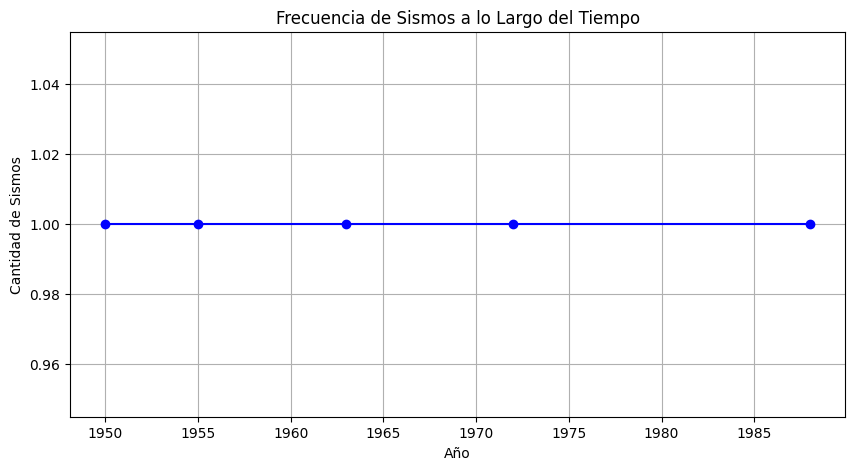

In [4]:
# Convertir la columna 'fecha_peru' a tipo datetime
df["fecha_peru"] = pd.to_datetime(df["fecha_peru"])

df["year"] = df["fecha_peru"].dt.year
sismos_por_anio = df["year"].value_counts().sort_index()

# Se prepara el gráfico
plt.figure(figsize=(10, 5))
plt.plot(sismos_por_anio.index, sismos_por_anio.values, marker="o", linestyle="-", color="b")
plt.xlabel("Año")
plt.ylabel("Cantidad de Sismos")
plt.title("Frecuencia de Sismos a lo Largo del Tiempo")
plt.grid(True)
plt.show()

Finalmente se genera un mapa de calor para poder visualizar la actividad sísmica

In [7]:
centro_mapa = [df['latitud'].mean(), df['longitud'].mean()]
m = folium.Map(location=centro_mapa, zoom_start=5, control_scale=True)
datos_heat = df[['latitud', 'longitud']].values.tolist()
HeatMap(datos_heat).add_to(m)
# Se ajusta el tamaño del mapa para no ocupar toda la celda. Esto se hace usando CSS.
m.save("mapa.html")
m